# IMA Projet : Waterpixels

Zakary SAHEB Benoît MARCHANDOT

In [123]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [124]:
pip install -U scikit-image

Requirement already up-to-date: scikit-image in /opt/anaconda3/lib/python3.7/site-packages (0.17.2)
Note: you may need to restart the kernel to use updated packages.


In [125]:
import imageio
import numpy
from matplotlib.pyplot import *

In [126]:
img = imread("bat.bmp")
rouge = img[:,:,0]
vert = img[:,:,1]
bleu = img[:,:,2]
figure(figsize=(15,15))
imshow(bleu, cmap='gray')

IndexError: too many indices for array

Gradient Deriche

In [127]:


import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage
from scipy import signal

from skimage import io

##############################################

import mrlab as mr

##############################################"

############## le close('all') de Matlab
plt.close('all')
################################"


alpha=1.5
seuilnorme=20
ima=rouge



gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  

   
plt.figure('Image originale')
plt.imshow(ima, cmap='gray')

plt.figure('Gradient horizontal')
plt.imshow(gradx, cmap='gray')

plt.figure('Gradient vertical')
plt.imshow(grady, cmap='gray')

norme=np.sqrt(gradx*gradx+grady*grady)

plt.figure('Norme du gradient')
plt.imshow(norme, cmap='gray')



#io.imsave('norme.tif',np.uint8(norme))

nl,nc=gradx.shape
direction=np.arctan2(np.ravel(grady),np.ravel(gradx));

direction=np.reshape(direction,(nl, -1))
direction=255*direction/2/math.pi;

plt.figure('Direction du gradient')
plt.imshow(direction)

io.imsave('direction.tif',np.uint8(direction))

contours=np.uint8(mr.maximaDirectionGradient(gradx,grady))

plt.figure('Contours')
plt.imshow(255*contours)


valcontours=(norme>seuilnorme)*contours
      
plt.figure('Contours normés')
plt.axis("off")
plt.imshow(255*valcontours)

#io.imsave('contours.tif',np.uint8(255*valcontours))


NameError: name 'rouge' is not defined

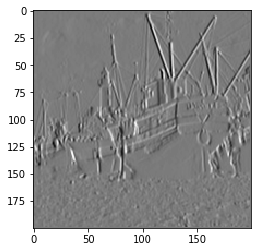

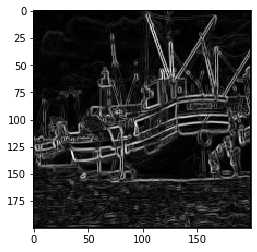

In [128]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from scipy import ndimage
from scipy import signal

from skimage import io

from skimage import filters


##############################################

import mrlab as mr

##############################################"

############## le close('all') de Matlab
plt.close('all')
################################"


ima=im=io.imread('bat.bmp')
sigma=0
seuilnorme=0.3


gfima=filters.gaussian(ima,sigma)

gradx=mr.sobelGradX(gfima)

plt.imshow(gradx, cmap='gray')
grady=mr.sobelGradY(gfima)

norme=np.sqrt(gradx*gradx+grady*grady)


plt.figure('Norme du gradient')
plt.imshow(norme, cmap='gray')


On retient le gradient sobel avec un seuilnorme=0,3

(200, 200)


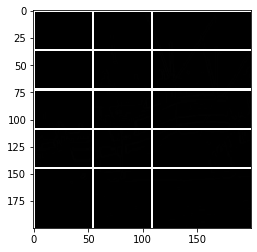

In [129]:
#--test pavage---

test=norme
n_i=np.shape(test)[0]
n_j=np.shape(test)[1]

print(np.shape(test))


n=[36,54]  #on fait un pavage de rectangles de 36*54
for i in range(n_i//n[0]):
    for j in range(n_j-1):
        test[i*n[0]][j],test[i*n[0]+1][j],test[i*n[0]][j+1],test[i*n[0]+1][j+1]=255,255,255,255

for j in range(n_j//n[1]):
    for i in range(n_i-1):
        test[i][j*n[1]],test[i+1][j*n[1]],test[i][j*n[1]+1],test[i+1][j*n[1]+1]=255,255,255,255
    
   

plt.imshow(test, cmap= 'gray')

Gradient Morphologique

In [130]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio


# POUR LA MORPHO
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

#%% SECTION 2 fonctions utiles pour le TP

def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme  
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.selem.diamond(taille)
    if forme == 'disk':
        return morpho.selem.disk(taille)
    if forme == 'square':
        return morpho.selem.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=morpho.selem.draw.line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')

            

def couleurs_alea(im):
    """ 
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

def gris_depuis_couleur(im):
    """ Transforme une image couleur en image a niveaux de gris"""
    return im[:,:,:3].sum(axis=2)/3
    


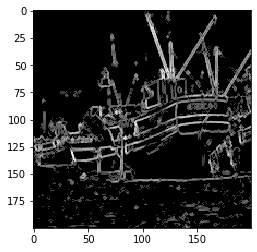

In [131]:
im=io.imread('bat.bmp') #mais format de l'image paysage ne convient pas pour la fonction
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")

Réalisation du pavage en cellules hexagonale

In [132]:
def taille_bande_separante(test):
    n=0
    m=taille_cellule
    while test[n][taille_cellule//2]>0:
        n+=1
    while test[m][0]>0:
        m-=1
    return(m-n)
    

In [133]:
def superposition(im,M):
    n,m = np.shape(im)[0],np.shape(im)[1]
    for i in range(n):
        for j in range(m):
            if M[i][j]==0:
                im[i][j]=0
    return(im)

In [134]:
#taille_cellule est le nombre de pixels que l'on veut par cellule
def creation_cellules(im,taille_cellule, bande_separante_min):
    n,m=np.shape(im)[0],np.shape(im)[1]
    M=np.zeros((n,m))
    
    for i in range(1,n//taille_cellule):                             #cette boucle sert à mettre des points tout à gauche, et tout à droite
        if i%2==0:
            M[i*taille_cellule][taille_cellule//2],M[i*taille_cellule][m-1]=255,255
        else :
            M[i*taille_cellule][0]=255
            
    for j in range(m//taille_cellule-1):
            M[0][j*taille_cellule+taille_cellule//2],M[n-1][j*taille_cellule+taille_cellule//2] = 255,255

    for i in range(1,n//taille_cellule):
        for j in range(1,m//taille_cellule):
            if i%2==0:
                M[i*taille_cellule][j*taille_cellule+taille_cellule//2]=255
            else:
                M[i*taille_cellule][j*taille_cellule]=255
                
    #dilatation de M:
    se=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]] #cet élément structurant est un hexagone

    test=M
    k=0
    t=(taille_bande_separante(test)>=bande_separante_min)
    while (t):
        test=morpho.dilation(test,se)
        t=(taille_bande_separante(test)>=bande_separante_min)
        k+=1
    
    for i in range(k-1):
        M=morpho.dilation(M,se) 
    
    #S=superposition(im,M)
    return M


#taille_cellule est le nombre de pixels que l'on veut par cellule
def creation_cellules2(im,taille_cellule, bande_separante_min):
    n,m=np.shape(im)[0],np.shape(im)[1]
    M=np.zeros((n,m))
    
    for i in range(1,n//taille_cellule):                             #cette boucle sert à mettre des points tout à gauche, et tout à droite
        if i%2==0:
            M[i*taille_cellule][taille_cellule//2]=255
        else :
            M[i*taille_cellule][0],M[i*taille_cellule][m-1]=255,255
            
    for j in range(m//taille_cellule):
            M[0][j*taille_cellule+taille_cellule//2],M[n-1][j*taille_cellule+taille_cellule//2] = 255,255

    for i in range(1,n//taille_cellule):
        for j in range(1,m//taille_cellule):
            if i%2==0:
                M[i*taille_cellule][j*taille_cellule+taille_cellule//2]=255
            else:
                M[i*taille_cellule][j*taille_cellule]=255
                
    #dilatation de M:
    se=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]] #cet élément structurant est un hexagone

    test=M
    k=0
    t=(taille_bande_separante(test)>=bande_separante_min)
    while (t):
        test=morpho.dilation(test,se)
        t=(taille_bande_separante(test)>=bande_separante_min)
        k+=1
    
    for i in range(k-1):
        M=morpho.dilation(M,se) 
    
    #S=superposition(im,M)
    return M

[[  0.   0. 255. ... 255. 255.   0.]
 [  0.   0. 255. ... 255. 255.   0.]
 [  0.   0. 255. ... 255. 255.   0.]
 ...
 [  0.   0. 255. ... 255. 255.   0.]
 [  0.   0. 255. ... 255. 255.   0.]
 [  0.   0. 255. ... 255. 255.   0.]]


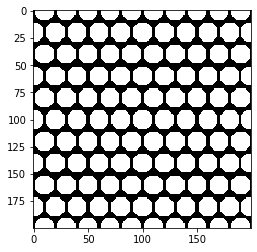

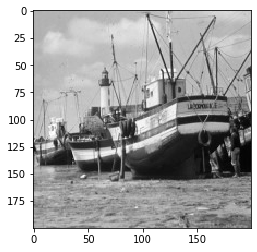

In [135]:
im=skio.imread('bat.bmp')
taille_cellule=20
bande_separante_min=2
M=creation_cellules2(im,taille_cellule,bande_separante_min)
plt.imshow(M,cmap='gray')
plt.figure()
plt.imshow(im,cmap='gray')

print(M)

In [136]:
from skimage.morphology import label

label1 = label(M)
connexes = [[] for i in range(np.max(label1))]
n,m = np.shape(im)

for i in range(1,np.max(label1)):
    for j in range(n):
        for k in range(m):
            if label1[j][k]==i:
                connexes[i].append([j,k,im[j][k]])
                

                


In [137]:
X = [connexes[40][j][0] for j in range(len(connexes[40]))]
Y = [connexes[40][j][1] for j in range(len(connexes[40]))]

#n_min et m_min blabla tu captes
# n_max et m_max correspondent aux indices maximums pour la composante connexe, de manière à pouvoir retravailler sur une image rectangulaire
n_min = np.min(X)
m_min = np.min(Y)
n_max = np.max(X)
m_max = np.max(Y)

new = np.zeros((n_max-n_min,n_max-n_min))

for i in range(n_min,n_max):
    for j in range(m_min,m_max):
        new[i][j] = im[i][j]
        
plt.imshow(new,cmap="gray")

IndexError: index 52 is out of bounds for axis 0 with size 16

2


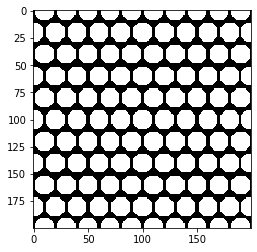

In [138]:
#gradx=mr.sobelGradX(im)
#grady=mr.sobelGradY(im)
#norme=np.sqrt(gradx*gradx+grady*grady)
se=morpho.selem.disk(1)

norme=morpho.dilation(im,se)-morpho.erosion(im,se)


n,m = np.shape(im)

minima = [[0,0] for i in range(np.max(label1))]

for i in range(1,np.max(label1)):
    minimum = 10000
    min_grad_index = [0,0]
    for j in range(n):
        for k in range(m):
            if label1[j][k] == i :
                if norme[j][k] < minimum :
                    min_grad_index = [j,k]
    minima[i] = min_grad_index

#On a un pb, c'est bcp trop régulier
    
#test pour la première composante connexe 
r = 1000
mini = [0,0]
for i in range(n):
    for j in range(m):
        if label1[i][j]==1:
            if norme[i][j]<r and norme[i][j]>0 :
                mini=[i,j]
                
print(norme[8][14])
    
plt.imshow(M,cmap="gray")

[1]
1


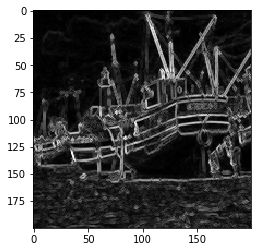

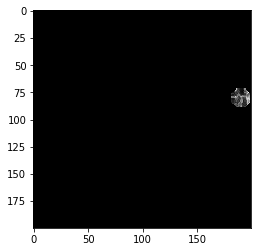

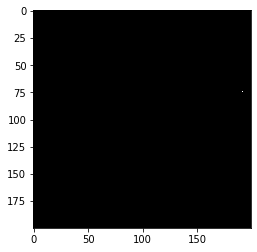

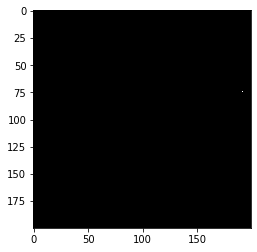

In [139]:
from collections import Counter

im_tmp = 0*np.ones((n,m))

min_grad = 0*np.ones((n,m))

for i in range(n):
    for j in range(m):
        if label1[i][j] == 52:
            im_tmp[i][j] = norme[i][j]
            
min = np.min(im_tmp[np.nonzero(im_tmp)])

tmp2 = 0*np.ones((n,m))

for i in range(n):
    for j in range(m):
        if im_tmp[i][j] == min:
            tmp2[i][j] = 255
            

label2 = label(tmp2)
label2_whithout_zero = []

for i in range(n):
    for j in range(m):
        if label2[i][j] != 0:
            label2_whithout_zero.append(label2[i][j])
            
print(label2_whithout_zero)

mostcommon = Counter(label2_whithout_zero).most_common(1)
print(mostcommon[0][0])

for i in range(n):
    for j in range(m):
        if label2[i][j] == mostcommon[0][0]:
            min_grad[i][j] = 255
            

plt.imshow(norme, cmap='gray')  
plt.figure()
plt.imshow(im_tmp, cmap = 'gray')
plt.figure()
plt.imshow(tmp2, cmap = 'gray')
plt.figure()
plt.imshow(min_grad, cmap = 'gray')
            

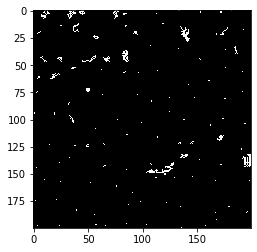

In [140]:
from collections import Counter

min_grad = 0*np.ones((n,m))

for k in range(np.max(label1)):
    im_tmp = 0*np.ones((n,m))
    for i in range(n):
        for j in range(m):
            if label1[i][j] == k:
                im_tmp[i][j] = norme[i][j]
                
    min = np.min(im_tmp[np.nonzero(im_tmp)])
    tmp2 = 0*np.ones((n,m))
    
    for i in range(n):
        for j in range(m):
            if im_tmp[i][j] == min:
                tmp2[i][j] = 255
                
    label2 = label(tmp2)
    label2_whithout_zero = []
    
    for i in range(n):
        for j in range(m):
            if label2[i][j] != 0:
                label2_whithout_zero.append(label2[i][j])
                
    mostcommon = Counter(label2_whithout_zero).most_common(1)
    
    for i in range(n):
        for j in range(m):
            if label2[i][j] == mostcommon[0][0]:
                min_grad[i][j] = 255
                
plt.imshow(min_grad, cmap = 'gray')
    

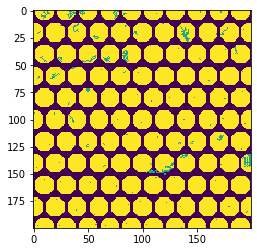

In [141]:
min_grad_wcells = list(M)
cells = creation_cellules2(im,taille_cellule,bande_separante_min)


for i in range(n):
    for j in range(m):
        if min_grad[i][j] == 255:
            cells[i][j] = 150
            
plt.imshow(cells)

In [142]:
from collections import Counter


def min_grad(grad,taille_cellule,bande_separante_min): 
    M = creation_cellules2(im,taille_cellule,bande_separante_min)
    n,m = np.shape(im)
    label1 = label(M)
    min_grad = 0*np.ones((n,m))
    
    #gradx=mr.sobelGradX(im)
    #grady=mr.sobelGradY(im)
    #norme=np.sqrt(gradx*gradx+grady*grady)
    
    #se=morpho.selem.disk(1)
    #norme=morpho.dilation(im,se)-morpho.erosion(im,se)
    
    norme = grad
    
    for k in range(np.max(label1)):
        im_tmp = 0*np.ones((n,m))
        for i in range(n):
            for j in range(m):
                if label1[i][j] == k:
                    im_tmp[i][j] = norme[i][j]
                
        min = np.min(im_tmp[np.nonzero(im_tmp)])
        tmp2 = 0*np.ones((n,m))
    
        for i in range(n):
            for j in range(m):
                if im_tmp[i][j] == min:
                    tmp2[i][j] = 255
                    
        label2 = label(tmp2)
        label2_whithout_zero = []
    
        for i in range(n):
            for j in range(m):
                if label2[i][j] != 0:
                    label2_whithout_zero.append(label2[i][j])
                
        mostcommon = Counter(label2_whithout_zero).most_common(1)
    
        for i in range(n):
            for j in range(m):
                if label2[i][j] == mostcommon[0][0]:
                    min_grad[i][j] = 255
                    
    return min_grad
                
    
    
    

    

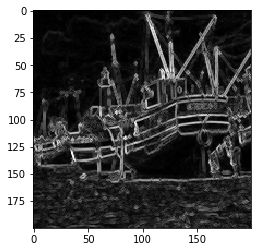

In [143]:
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
plt.imshow(grad, cmap='gray')

In [144]:
M = min_grad(grad,taille_cellule,bande_separante_min)

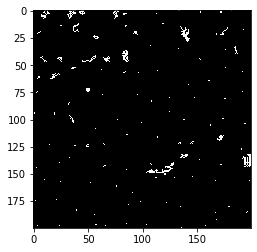

In [145]:
plt.imshow(M, cmap='gray')

200
200


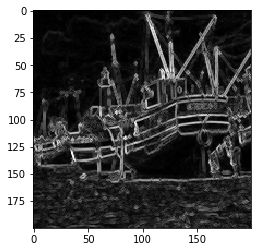

In [146]:
se=morpho.selem.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
plt.imshow(grad, cmap='gray')
print(len(grad))
print(len(im))

20 2


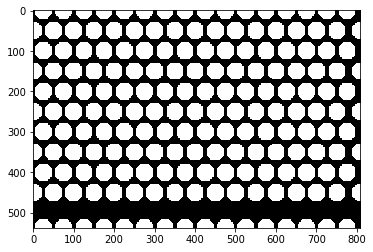

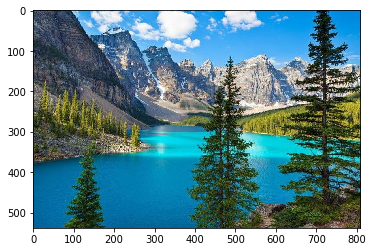

In [147]:
im2 = im=skio.imread('paysage.jpg')
taille_cellule=20
bande_separante_min=2
M=creation_cellules2(im2,50,2)
plt.imshow(M,cmap='gray')
plt.figure()
plt.imshow(im2,cmap='gray')
print(taille_cellule,bande_separante_min)

In [148]:
se=morpho.selem.disk(1)
grad2=morpho.dilation(im2,se)-morpho.erosion(im2,se)

gradx=mr.sobelGradX(gfima)
grady=mr.sobelGradY(gfima)

norme=np.sqrt(gradx*gradx+grady*grady)


IndexError: tuple index out of range

In [149]:
M = min_grad(grad2,50,2)

NameError: name 'grad2' is not defined

In [150]:
## Normalisation du gradient

def grag_reg(grad, distance, k):
    n,m = np.shape(grad)
    res = 0*np.ones((n,m))
    for i in range(n):
        for j in range(m):
            res[i][j] = grad[i][j]+k*distance[i][j]
    return res
    